Importing the necessary libaries

In [116]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

In [117]:
import string

In [118]:
import matplotlib.pyplot as plt

Importing the dataset from keras

In [119]:
from keras.datasets import imdb

Function to plot the training vs validation accuracy and loss for each trained model

In [120]:
def plot(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.title('Training and validation accuracy')
  plt.plot(epochs, acc, color='blue', label='Train')
  plt.plot(epochs, val_acc, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  _ = plt.figure()
  plt.title('Training and validation loss')
  plt.plot(epochs, loss, color='blue', label='Train')
  plt.plot(epochs, val_loss, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

Initializing the vocabulary size and the length of the review variables. 
Value of 1000 for vocabulary size means the first 997 most frequent words are considered only in each review.

In [121]:
VOCAB_SIZE=1000
REVIEW_WORD_COUNT=300

Loading and splitting the dataset. The number of unique and most frequent words is equal to VOCAB_SIZE. Index 0 is for padding, 1 is for start of review and 2 is for unknown word.  

In [122]:
(x_train_1k, y_train_1k),(x_test_1k, y_test_1k) = imdb.load_data(num_words=VOCAB_SIZE)

By default, 50% of reviews is for training set and 50% for test set.

In [123]:
print(x_train_1k.shape)
print(x_test_1k.shape)
print(y_train_1k.shape)
print(y_test_1k.shape)

(25000,)
(25000,)
(25000,)
(25000,)


Observing the random review in the training set. The integer is corresponding to the frequency of this word in the reviews. Lower integer -> higher frequency and vice versa.

In [124]:
x_train_1k[12]

[1,
 13,
 119,
 954,
 189,
 2,
 13,
 92,
 459,
 48,
 4,
 116,
 9,
 2,
 2,
 42,
 726,
 4,
 2,
 168,
 2,
 13,
 423,
 14,
 20,
 549,
 18,
 4,
 2,
 547,
 32,
 4,
 96,
 39,
 4,
 454,
 7,
 4,
 22,
 8,
 4,
 55,
 130,
 168,
 13,
 92,
 359,
 6,
 158,
 2,
 2,
 42,
 6,
 2,
 19,
 194,
 2,
 2,
 6,
 114,
 8,
 72,
 21,
 465,
 2,
 304,
 4,
 51,
 9,
 14,
 20,
 44,
 155,
 8,
 6,
 226,
 162,
 616,
 651,
 51,
 9,
 14,
 20,
 44,
 10,
 10,
 14,
 218,
 2,
 629,
 42,
 2,
 21,
 48,
 25,
 28,
 35,
 534,
 5,
 6,
 320,
 8,
 516,
 5,
 42,
 25,
 181,
 8,
 130,
 56,
 547,
 2,
 5,
 2,
 851,
 14,
 2]

Observing its label. 0 is for negative and 1 is for positive.

In [198]:
y_train_1k[12]

0

Applying padding to the train and test reviews. If review is less than REVIEW_WORD_COUNT, then padding is applied in the beginning. 

In [125]:
x_train_1k = tf.keras.utils.pad_sequences(x_train_1k, REVIEW_WORD_COUNT)
x_test_1k = tf.keras.utils.pad_sequences(x_test_1k, REVIEW_WORD_COUNT)

The reviews after the padding.

In [126]:
x_train_1k[25]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1,  14,   9,   6,  55, 641,   2, 212,  44,   6, 389,
       223,  15,  47,   6, 492, 446,   2,  88,  29, 361,   8,   

There is a get_word_index() function from the dataset library which returns the dictionary with the key as the word itself and the value as the frequency index of the word. We get that dictionary and add the padding, review start and unknown word tokens. 3 is added to each value since the latters are not in the returned dictionary.

In [127]:
word_to_index = imdb.get_word_index()
word_to_index = { key: (value+3) for key, value in word_to_index.items()}
word_to_index["<PAD>"] = 0
word_to_index["<START>"] = 1
word_to_index["<UNK>"] = 2

Checking the frequency index of the word 'good'.

In [128]:
word_to_index['good']

52

Creating a dictionary with reversed key and value.

In [130]:
index_to_word = { index : word for word, index in word_to_index.items() }

Checking the correctness of the frequency.

In [131]:
index_to_word[52]

'good'

Printing the random review from the training set. 

In [132]:
print(" ".join(index_to_word[index] for index in x_train_1k[10]))

a short while in the <UNK> together they <UNK> upon a <UNK> place in the <UNK> that <UNK> an old <UNK> after <UNK> part of it they soon <UNK> its <UNK> <UNK> and <UNK> they may be able to use it to break through the <UNK> <UNK> br br black <UNK> is a very interesting <UNK> and i'm actually quite surprised that there aren't more films based on it as there's so much <UNK> for things to do with it it's <UNK> to say that <UNK> makes the best of it's <UNK> as despite it's <UNK> the film never actually feels <UNK> and <UNK> to <UNK> well throughout director <UNK> <UNK> <UNK> a great atmosphere for the film the fact that most of it takes place <UNK> the <UNK> <UNK> <UNK> <UNK> that the film feels very <UNK> and this <UNK> <UNK> the <UNK> idea of the <UNK> <UNK> to use <UNK> to break out of the <UNK> it's very easy to get behind them it's often said that the <UNK> is the thing that really <UNK> people and this film <UNK> that as the director <UNK> that we can never really be sure of exactly wh

Creating, compiling and training the first model with LSTM layer for 1000 as VOCAB_SIZE.

In [133]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 32, input_length=REVIEW_WORD_COUNT),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [134]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy']) 

In [135]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_21 (Embedding)    (None, 300, 32)           32000     
                                                                 
 lstm_8 (LSTM)               (None, 32)                8320      
                                                                 
 dense_22 (Dense)            (None, 1)                 33        
                                                                 
Total params: 40,353
Trainable params: 40,353
Non-trainable params: 0
_________________________________________________________________


In [136]:
history_1k = model.fit(x_train_1k, y_train_1k, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
625/625 [==============================] - 23s 33ms/step - loss: 0.4650 - accuracy: 0.7778 - val_loss: 0.3747 - val_accuracy: 0.8432
Epoch 2/10
625/625 [==============================] - 10s 16ms/step - loss: 0.3471 - accuracy: 0.8541 - val_loss: 0.3409 - val_accuracy: 0.8540
Epoch 3/10
625/625 [==============================] - 8s 14ms/step - loss: 0.3279 - accuracy: 0.8633 - val_loss: 0.3424 - val_accuracy: 0.8502
Epoch 4/10
625/625 [==============================] - 9s 14ms/step - loss: 0.3123 - accuracy: 0.8680 - val_loss: 0.3353 - val_accuracy: 0.8538
Epoch 5/10
625/625 [==============================] - 8s 13ms/step - loss: 0.2976 - accuracy: 0.8758 - val_loss: 0.3589 - val_accuracy: 0.8420
Epoch 6/10
625/625 [==============================] - 7s 12ms/step - loss: 0.2887 - accuracy: 0.8777 - val_loss: 0.3647 - val_accuracy: 0.8556
Epoch 7/10
625/625 [==============================] - 8s 13ms/step - loss: 0.2831 - accuracy: 0.8809 - val_loss: 0.3415 - val_accuracy: 0.85

In [137]:
eval = model.evaluate(x_test_1k, y_test_1k)

782/782 [==============================] - 5s 6ms/step - loss: 0.3628 - accuracy: 0.8521


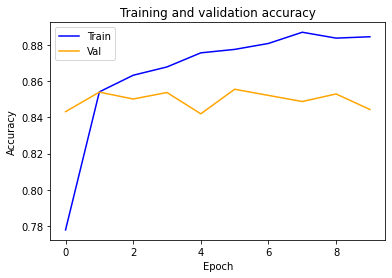

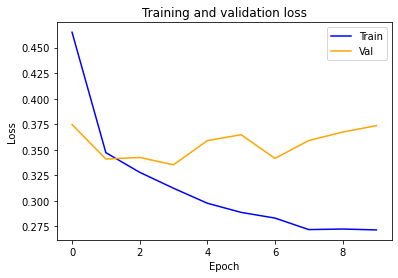

In [138]:
plot(history_1k)

Function for preproccessing the input review and predicting its sentiment.
It first strips out the punctuation marks and converts to lowercase. Then each word is tokenized based on the dictionary. 

In [243]:
def input_predict(review):
    inds = [1]
    translation_table = str.maketrans('', '', string.punctuation) 
    review = str.lower(review.translate(translation_table))
    for word in review.split(" "):
      if word in word_to_index.keys():
        inds.append(word_to_index[word])
      else:
        inds.append(2)
    inds_padded = tf.keras.utils.pad_sequences([inds], REVIEW_WORD_COUNT)
    pred = model.predict(inds_padded)[0]
    print(pred)
    if pred > 0.5:
      print("positive")
    else:
      print("negative")

In [244]:
input_predict("Great play, interesting plot, happy ending. All I need to enjoy the movie. Zayebali")

1/1 [==============================] - 0s 26ms/step
[0.6639759]
positive


Changing vocabulary size to 3000 to see if it improves the accuracy.

In [142]:
VOCAB_SIZE=3000

In [143]:
(x_train_3k, y_train_3k),(x_test_3k, y_test_3k) = imdb.load_data(num_words=VOCAB_SIZE)
x_train_3k = tf.keras.utils.pad_sequences(x_train_3k, REVIEW_WORD_COUNT)
x_test_3k = tf.keras.utils.pad_sequences(x_test_3k, REVIEW_WORD_COUNT)

In [144]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 32, input_length=REVIEW_WORD_COUNT),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [145]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy']) 

In [146]:
history_3k = model.fit(x_train_3k, y_train_3k, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
625/625 [==============================] - 35s 53ms/step - loss: 0.4294 - accuracy: 0.7981 - val_loss: 0.3665 - val_accuracy: 0.8558
Epoch 2/10
625/625 [==============================] - 11s 18ms/step - loss: 0.3032 - accuracy: 0.8771 - val_loss: 0.3138 - val_accuracy: 0.8660
Epoch 3/10
625/625 [==============================] - 10s 17ms/step - loss: 0.2552 - accuracy: 0.8989 - val_loss: 0.3283 - val_accuracy: 0.8662
Epoch 4/10
625/625 [==============================] - 10s 16ms/step - loss: 0.2415 - accuracy: 0.9050 - val_loss: 0.3309 - val_accuracy: 0.8644
Epoch 5/10
625/625 [==============================] - 9s 14ms/step - loss: 0.2154 - accuracy: 0.9176 - val_loss: 0.3442 - val_accuracy: 0.8610
Epoch 6/10
625/625 [==============================] - 9s 14ms/step - loss: 0.1917 - accuracy: 0.9274 - val_loss: 0.3672 - val_accuracy: 0.8598
Epoch 7/10
625/625 [==============================] - 9s 14ms/step - loss: 0.2245 - accuracy: 0.9078 - val_loss: 0.3442 - val_accuracy: 0.

In [147]:
eval = model.evaluate(x_test_3k, y_test_3k)

782/782 [==============================] - 5s 7ms/step - loss: 0.4011 - accuracy: 0.8616


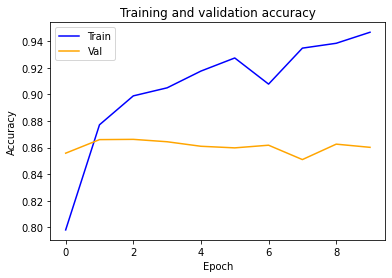

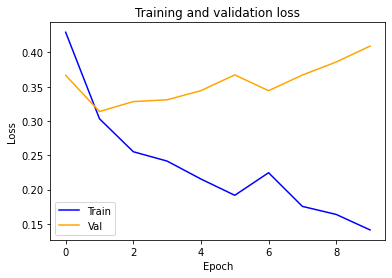

In [148]:
plot(history_3k)

As can be seen above, the test accuracy is approximately the same (0.85 vs 0.86), while the latter model overfits significantly as seen in the graph above.

Increasing the vocabulary size to 10000 just to confirm the above.

In [149]:
VOCAB_SIZE=10000

In [150]:
(x_train_10k, y_train_10k),(x_test_10k, y_test_10k) = imdb.load_data(num_words=VOCAB_SIZE)
x_train_10k = tf.keras.utils.pad_sequences(x_train_10k, REVIEW_WORD_COUNT)
x_test_10k = tf.keras.utils.pad_sequences(x_test_10k, REVIEW_WORD_COUNT)

In [151]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 32, input_length=REVIEW_WORD_COUNT),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [152]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy']) 

In [153]:
history_10k = model.fit(x_train_10k, y_train_10k, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
625/625 [==============================] - 43s 65ms/step - loss: 0.4424 - accuracy: 0.7854 - val_loss: 0.3325 - val_accuracy: 0.8610
Epoch 2/10
625/625 [==============================] - 17s 27ms/step - loss: 0.2554 - accuracy: 0.8992 - val_loss: 0.3171 - val_accuracy: 0.8646
Epoch 3/10
625/625 [==============================] - 12s 19ms/step - loss: 0.1833 - accuracy: 0.9322 - val_loss: 0.3582 - val_accuracy: 0.8396
Epoch 4/10
625/625 [==============================] - 10s 16ms/step - loss: 0.1682 - accuracy: 0.9385 - val_loss: 0.3765 - val_accuracy: 0.8580
Epoch 5/10
625/625 [==============================] - 12s 19ms/step - loss: 0.1295 - accuracy: 0.9527 - val_loss: 0.3990 - val_accuracy: 0.8644
Epoch 6/10
625/625 [==============================] - 9s 15ms/step - loss: 0.0991 - accuracy: 0.9657 - val_loss: 0.4437 - val_accuracy: 0.8668
Epoch 7/10
625/625 [==============================] - 9s 15ms/step - loss: 0.0724 - accuracy: 0.9761 - val_loss: 0.4794 - val_accuracy: 0

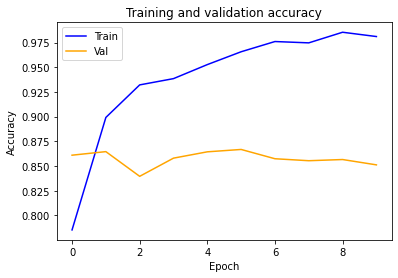

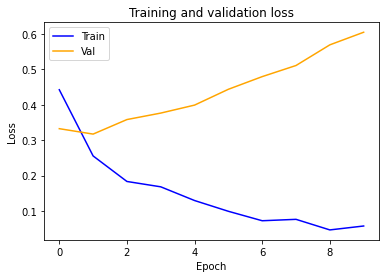

In [154]:
plot(history_10k)

Again, the model overfits even more significantly.

Changing the vocabulary size back to 1000. 

In [158]:
VOCAB_SIZE=1000

Now using GRU layer instead of LSTM to see if it improves the model.

In [159]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 32, input_length=REVIEW_WORD_COUNT),
    tf.keras.layers.GRU(32),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [160]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy']) 

In [161]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_25 (Embedding)    (None, 300, 32)           32000     
                                                                 
 gru_14 (GRU)                (None, 32)                6336      
                                                                 
 dense_26 (Dense)            (None, 1)                 33        
                                                                 
Total params: 38,369
Trainable params: 38,369
Non-trainable params: 0
_________________________________________________________________


In [162]:
history_gru = model.fit(x_train_1k, y_train_1k, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
625/625 [==============================] - 21s 31ms/step - loss: 0.4782 - accuracy: 0.7574 - val_loss: 0.3981 - val_accuracy: 0.8226
Epoch 2/10
625/625 [==============================] - 9s 15ms/step - loss: 0.3482 - accuracy: 0.8528 - val_loss: 0.3580 - val_accuracy: 0.8458
Epoch 3/10
625/625 [==============================] - 8s 13ms/step - loss: 0.3163 - accuracy: 0.8684 - val_loss: 0.3351 - val_accuracy: 0.8576
Epoch 4/10
625/625 [==============================] - 9s 14ms/step - loss: 0.2981 - accuracy: 0.8774 - val_loss: 0.3505 - val_accuracy: 0.8584
Epoch 5/10
625/625 [==============================] - 8s 12ms/step - loss: 0.2734 - accuracy: 0.8881 - val_loss: 0.3120 - val_accuracy: 0.8678
Epoch 6/10
625/625 [==============================] - 8s 13ms/step - loss: 0.2597 - accuracy: 0.8963 - val_loss: 0.3233 - val_accuracy: 0.8710
Epoch 7/10
625/625 [==============================] - 8s 12ms/step - loss: 0.2461 - accuracy: 0.9024 - val_loss: 0.3162 - val_accuracy: 0.869

In [163]:
eval = model.evaluate(x_test_1k, y_test_1k)

782/782 [==============================] - 5s 7ms/step - loss: 0.3200 - accuracy: 0.8700


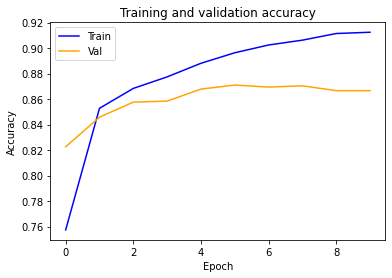

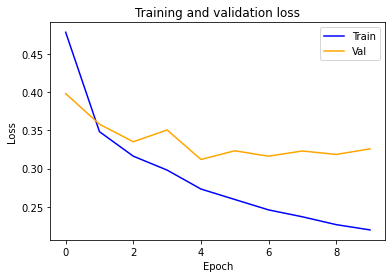

In [164]:
plot(history_gru)

The model with GRU layer slightly improves the accuracy (0.85 --> 0.87).

Now checking if making the GRU layer bidirectional improves the accuracy.

In [165]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 32, input_length=REVIEW_WORD_COUNT),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [166]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy']) 

In [167]:
history_bi_gru = model.fit(x_train_1k, y_train_1k, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
625/625 [==============================] - 29s 41ms/step - loss: 0.5093 - accuracy: 0.7322 - val_loss: 0.4089 - val_accuracy: 0.8244
Epoch 2/10
625/625 [==============================] - 14s 22ms/step - loss: 0.3657 - accuracy: 0.8440 - val_loss: 0.3742 - val_accuracy: 0.8440
Epoch 3/10
625/625 [==============================] - 14s 22ms/step - loss: 0.3363 - accuracy: 0.8591 - val_loss: 0.3536 - val_accuracy: 0.8504
Epoch 4/10
625/625 [==============================] - 14s 22ms/step - loss: 0.3103 - accuracy: 0.8723 - val_loss: 0.3494 - val_accuracy: 0.8498
Epoch 5/10
625/625 [==============================] - 13s 21ms/step - loss: 0.2832 - accuracy: 0.8870 - val_loss: 0.3114 - val_accuracy: 0.8722
Epoch 6/10
625/625 [==============================] - 13s 21ms/step - loss: 0.2669 - accuracy: 0.8907 - val_loss: 0.3199 - val_accuracy: 0.8634
Epoch 7/10
625/625 [==============================] - 13s 21ms/step - loss: 0.2439 - accuracy: 0.9005 - val_loss: 0.3143 - val_accuracy:

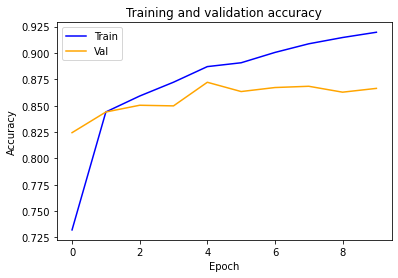

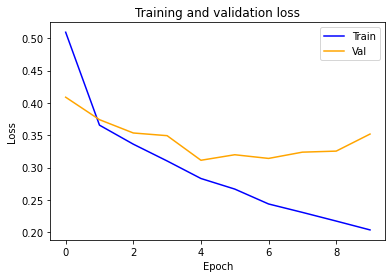

In [168]:
plot(history_bi_gru)

As can be seen from both models, the difference is insignificant. 

Now adding the convolutional layer to see if it improves the model.

In [169]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 32, input_length=REVIEW_WORD_COUNT),
    tf.keras.layers.Conv1D(32, 5, activation='relu'),
    tf.keras.layers.GRU(32),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [170]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy']) 

In [171]:
history = model.fit(x_train_1k, y_train_1k, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
625/625 [==============================] - 23s 33ms/step - loss: 0.4931 - accuracy: 0.7455 - val_loss: 0.3869 - val_accuracy: 0.8358
Epoch 2/10
625/625 [==============================] - 10s 16ms/step - loss: 0.3482 - accuracy: 0.8536 - val_loss: 0.3690 - val_accuracy: 0.8386
Epoch 3/10
625/625 [==============================] - 10s 16ms/step - loss: 0.3099 - accuracy: 0.8719 - val_loss: 0.3072 - val_accuracy: 0.8674
Epoch 4/10
625/625 [==============================] - 9s 15ms/step - loss: 0.2731 - accuracy: 0.8884 - val_loss: 0.3133 - val_accuracy: 0.8676
Epoch 5/10
625/625 [==============================] - 9s 14ms/step - loss: 0.2536 - accuracy: 0.8996 - val_loss: 0.3053 - val_accuracy: 0.8730
Epoch 6/10
625/625 [==============================] - 9s 14ms/step - loss: 0.2297 - accuracy: 0.9097 - val_loss: 0.3422 - val_accuracy: 0.8480
Epoch 7/10
625/625 [==============================] - 8s 13ms/step - loss: 0.2096 - accuracy: 0.9190 - val_loss: 0.3319 - val_accuracy: 0.8

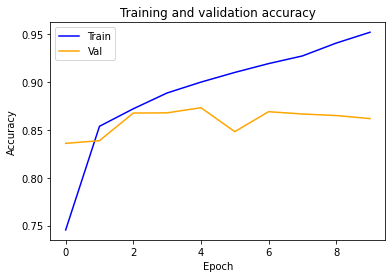

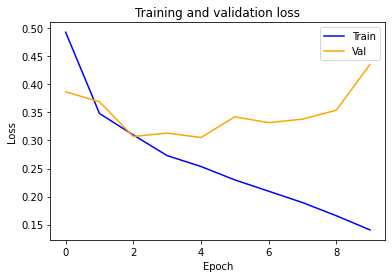

In [172]:
plot(history)

As can be seen, the model gives the same accuracy but overfits significantly. 

Making vocabulary size 10000 to see if it is more suitable for the more complex model with convolutional layer.

In [173]:
VOCAB_SIZE=10000

In [180]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 32, input_length=REVIEW_WORD_COUNT),
    tf.keras.layers.Conv1D(32, 5, activation='relu'),
    tf.keras.layers.GRU(32),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [175]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy']) 

In [176]:
history = model.fit(x_train_10k, y_train_10k, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
625/625 [==============================] - 46s 70ms/step - loss: 0.4646 - accuracy: 0.7606 - val_loss: 0.3310 - val_accuracy: 0.8564
Epoch 2/10
625/625 [==============================] - 17s 27ms/step - loss: 0.2247 - accuracy: 0.9131 - val_loss: 0.2765 - val_accuracy: 0.8884
Epoch 3/10
625/625 [==============================] - 13s 20ms/step - loss: 0.1411 - accuracy: 0.9491 - val_loss: 0.3256 - val_accuracy: 0.8642
Epoch 4/10
625/625 [==============================] - 10s 16ms/step - loss: 0.0852 - accuracy: 0.9712 - val_loss: 0.3770 - val_accuracy: 0.8884
Epoch 5/10
625/625 [==============================] - 11s 18ms/step - loss: 0.0561 - accuracy: 0.9830 - val_loss: 0.4275 - val_accuracy: 0.8810
Epoch 6/10
625/625 [==============================] - 10s 17ms/step - loss: 0.0297 - accuracy: 0.9924 - val_loss: 0.4773 - val_accuracy: 0.8778
Epoch 7/10
625/625 [==============================] - 10s 16ms/step - loss: 0.0252 - accuracy: 0.9930 - val_loss: 0.5030 - val_accuracy:

In [178]:
eval = model.evaluate(x_test_10k, y_test_10k)

782/782 [==============================] - 5s 6ms/step - loss: 0.6756 - accuracy: 0.8579


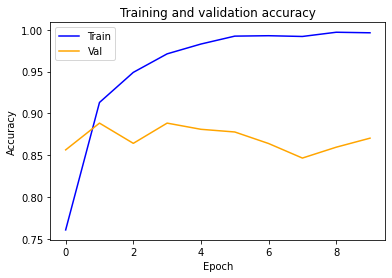

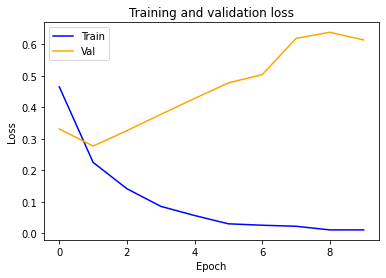

In [181]:
plot(history)

As can be seen above,the model overfits even more while producing the same accuracy. 

Making the final adjustments. Going back to the best model with vocabulary size 1000 and GRU layer. Now trying to add Dropout layer to reduce the overfitting.

In [182]:
VOCAB_SIZE=1000

In [186]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 32, input_length=REVIEW_WORD_COUNT),
    tf.keras.layers.GRU(32),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [187]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy']) 

In [188]:
history = model.fit(x_train_1k, y_train_1k, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
625/625 [==============================] - 22s 32ms/step - loss: 0.5052 - accuracy: 0.7377 - val_loss: 0.3824 - val_accuracy: 0.8322
Epoch 2/10
625/625 [==============================] - 9s 14ms/step - loss: 0.3554 - accuracy: 0.8512 - val_loss: 0.3636 - val_accuracy: 0.8434
Epoch 3/10
625/625 [==============================] - 10s 16ms/step - loss: 0.3173 - accuracy: 0.8724 - val_loss: 0.3301 - val_accuracy: 0.8686
Epoch 4/10
625/625 [==============================] - 8s 14ms/step - loss: 0.2918 - accuracy: 0.8814 - val_loss: 0.3055 - val_accuracy: 0.8714
Epoch 5/10
625/625 [==============================] - 10s 15ms/step - loss: 0.2738 - accuracy: 0.8903 - val_loss: 0.3017 - val_accuracy: 0.8720
Epoch 6/10
625/625 [==============================] - 7s 12ms/step - loss: 0.2617 - accuracy: 0.8950 - val_loss: 0.3083 - val_accuracy: 0.8752
Epoch 7/10
625/625 [==============================] - 8s 13ms/step - loss: 0.2478 - accuracy: 0.9010 - val_loss: 0.3032 - val_accuracy: 0.8

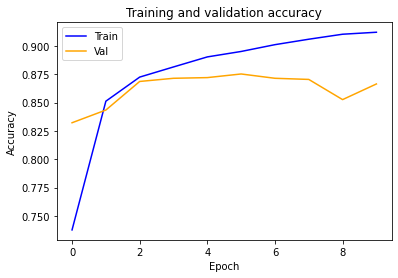

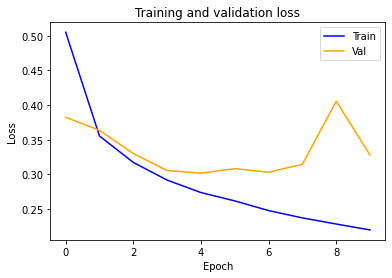

In [189]:
plot(history)

As can be seen above, this doesn't help to fight overfitting. The results are similar to initial model. 

In [191]:
from tensorflow.keras import regularizers

Now trying to add the l2 regularizer to reduce overfitting.

In [192]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 32, input_length=REVIEW_WORD_COUNT),
    tf.keras.layers.GRU(32),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))
])

In [194]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy']) 

In [195]:
history = model.fit(x_train_1k, y_train_1k, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
625/625 [==============================] - 62s 97ms/step - loss: 0.5347 - accuracy: 0.7319 - val_loss: 0.4203 - val_accuracy: 0.8228
Epoch 2/10
625/625 [==============================] - 9s 15ms/step - loss: 0.3988 - accuracy: 0.8365 - val_loss: 0.3989 - val_accuracy: 0.8362
Epoch 3/10
625/625 [==============================] - 8s 13ms/step - loss: 0.3643 - accuracy: 0.8563 - val_loss: 0.3662 - val_accuracy: 0.8544
Epoch 4/10
625/625 [==============================] - 9s 14ms/step - loss: 0.3418 - accuracy: 0.8668 - val_loss: 0.3488 - val_accuracy: 0.8574
Epoch 5/10
625/625 [==============================] - 8s 13ms/step - loss: 0.3288 - accuracy: 0.8745 - val_loss: 0.3430 - val_accuracy: 0.8600
Epoch 6/10
625/625 [==============================] - 8s 13ms/step - loss: 0.3141 - accuracy: 0.8809 - val_loss: 0.3320 - val_accuracy: 0.8658
Epoch 7/10
625/625 [==============================] - 8s 13ms/step - loss: 0.2996 - accuracy: 0.8899 - val_loss: 0.3312 - val_accuracy: 0.864

In [196]:
eval = model.evaluate(x_test_1k, y_test_1k)

782/782 [==============================] - 5s 7ms/step - loss: 0.3254 - accuracy: 0.8672


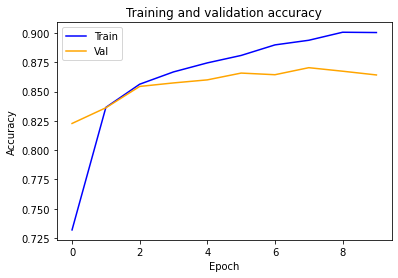

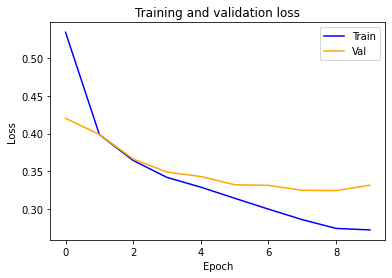

In [197]:
plot(history)

The overfitting was reduced insignificantly compared to initial model. 

Seeing how the model performs on the latest reviews from the imdb website.

8/10 review (https://www.imdb.com/review/rw8837635/?ref_=tt_urv), should be positive:

In [241]:
positive_review = "I'm not here to comment on the relationship to the video game this show is adapted from, I don't play games like that and don't know or care anything about them. From a purely cinematic point of view, this show is excellent thru the three episodes I have seen so far. Art direction and set decoration is superb, as is cinematography. Performances range from adequate to damn good. Writing is topnotch, I was not expecting much from a show with this one's premise -- I don't even bother watching any of the 'Walking Dead' shows for that reason -- but the way in which they introduced the storyline, the various backstories, the human consequences and endurance of catastrophe, are all very well constructed and detailed, dialog is appropriately sparse yet nothing important is left out. In particular, S1E3 is one of the most dramatically beautiful episodes of any show I've ever seen, thanks to the lovely guest performances of Nick Offerman and Murray Bartlett, and the poignant voice of the glorious Linda Ronstadt in the soundtrack. That episode alone deserves 10 out of 10 stars. Since it's early yet, I'm reserving judgment on the overall series and being conservative with that rating, (the 8 is really 8.5 rounded down), but I'm definitely looking forward to the rest of the season."

4/10 review (https://www.imdb.com/review/rw8855589/?ref_=tt_urv), should be negative:

In [227]:
negative_review = "Started off pretty good, spot on to the details of the game, as we as some interesting back story etc. However the last 2 episodes 3 and 4 are boring... Nothing happens, at least nothing worth watching, it's typical content already been done in the walking dead or any other zombie show. Just a lot of talking and a whole lot of nothing going on... He has been in the apocalypse for 20 years and he does not know better not to drive his very well maintained, fully loaded truck into an apocalypse ridden town? That whole thing was super stupid! Oh wow now we have no car or way out of here and a whole town full of armed, paranoid people that want us dead.... Again nothing happens. BORING!"

7/10 review (https://www.imdb.com/review/rw8858231/?ref_=tt_urv), should be close to neutral:

In [247]:
neutral_review = "What can I say, these scores 9 and 10 when people say it's the best show ever, I am sorry but its not, as well as its not the worse show, I would say an 8 is pushing it but I can let it pass. I haven't played the video game but if a series is based on a video game or book I probably think the books and game is better just like the Witcher or Tombraider. Now why do they have to associate a strong woman as an unsffurable one like Ellie and make the Joel a pushover. Example of a likeable strong woman Laura Croft, Ripley and Sarah Connor. Also what is it with episode 3, why they have to include a gay couple just for the sake and they have no relevance to the plot?"

In [256]:
input_predict(positive_review)

1/1 [==============================] - 0s 26ms/step
[0.935884]
positive


In [257]:
input_predict(negative_review)

1/1 [==============================] - 0s 25ms/step
[0.02484023]
negative


In [258]:
input_predict(neutral_review)

1/1 [==============================] - 0s 25ms/step
[0.76564145]
positive
